# Explanatory data Analysis

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydicom

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Train data description

In [26]:
train_data_desc = pd.read_csv('data/chest_xray/train.csv')

In [27]:
class_names = {
    0:'Aortic enlargement',
    1:'Atelectasis',
    2: 'Calcification',
    3: 'Cardiomegaly',
    4 : 'Consolidation',
    5 : 'ILD',
    6 : 'Infiltration',
    7 : 'Lung Opacity',
    8 : 'Nodule/Mass',
    9 : 'Other lesion',
    10 : 'Pleural effusion',
    11 : 'Pleural thickening',
    12 : 'Pneumothorax',
    13 : 'Pulmonary fibrosis'   
}


train_data_desc

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [28]:
train_data_desc.groupby(['image_id', 'rad_id'])['class_name'].nunique()

image_id                          rad_id
000434271f63a053c4128a0ba6352c7f  R2        1
                                  R3        1
                                  R6        1
00053190460d56c53cc3e57321387478  R11       1
                                  R2        1
                                           ..
fff0f82159f9083f3dd1f8967fc54f6a  R8        1
                                  R9        1
fff2025e3c1d6970a8a6ee0404ac6940  R1        1
                                  R2        1
                                  R5        1
Name: class_name, Length: 45000, dtype: int64

In [9]:
train_data_desc.class_name.unique()

array(['No finding', 'Cardiomegaly', 'Aortic enlargement',
       'Pleural thickening', 'ILD', 'Nodule/Mass', 'Pulmonary fibrosis',
       'Lung Opacity', 'Atelectasis', 'Other lesion', 'Infiltration',
       'Pleural effusion', 'Calcification', 'Consolidation',
       'Pneumothorax'], dtype=object)

In [30]:
train_data_path = 'data/chest_xray/train/'
available_files = [f.split('.')[0] for f in os.listdir(train_data_path) if f.endswith('dicom')]

In [43]:
file = available_files[2]

dcom_image = pydicom.dcmread(os.path.join(train_data_path, file + '.dicom'))
train_data_desc.loc[train_data_desc.image_id == file]


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
664,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,900.0,587.0,1205.0,888.0
13648,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,932.0,567.0,1197.0,896.0
15180,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,900.0,587.0,1205.0,888.0
16938,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,905.0,583.0,1203.0,890.0
48751,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,932.0,567.0,1197.0,896.0


In [45]:
dcom_image.convert_pixel_data()

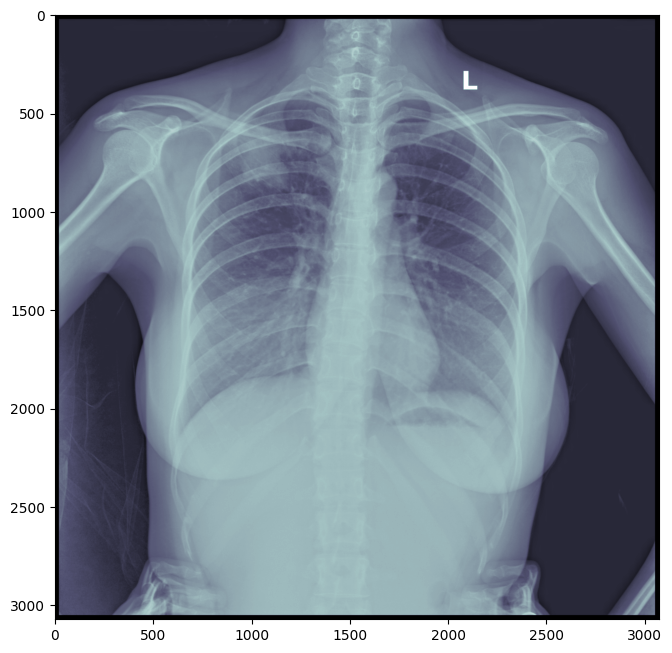

In [54]:

plt.imshow(dcom_image.pixel_array, cmap=plt.cm.bone)

In [37]:
train_data_desc.groupby(['image_id']).nunique()

,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
image_id,,,,,,,
000434271f63a053c4128a0ba6352c7f,1,1,3,0,0,0,0
00053190460d56c53cc3e57321387478,1,1,3,0,0,0,0
0005e8e3701dfb1dd93d53e2ff537b6e,4,4,3,3,3,3,3
0006e0a85696f6bb578e84fafa9a5607,1,1,3,0,0,0,0
0007d316f756b3fa0baea2ff514ce945,5,5,3,10,10,10,10
...,...,...,...,...,...,...,...
ffe6f9fe648a7ec29a50feb92d6c15a4,3,3,3,5,5,4,5
ffea246f04196af602c7dc123e5e48fc,1,1,3,0,0,0,0
ffeffc54594debf3716d6fcd2402a99f,1,1,3,3,3,3,3


In [65]:
train_data_desc.loc[train_data_desc.image_id == file]

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
664,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,900.0,587.0,1205.0,888.0
13648,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,932.0,567.0,1197.0,896.0
15180,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,900.0,587.0,1205.0,888.0
16938,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,905.0,583.0,1203.0,890.0
48751,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,932.0,567.0,1197.0,896.0


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
664,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,900.0,587.0,1205.0,888.0
13648,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,932.0,567.0,1197.0,896.0
15180,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,900.0,587.0,1205.0,888.0
16938,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,905.0,583.0,1203.0,890.0
48751,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,932.0,567.0,1197.0,896.0


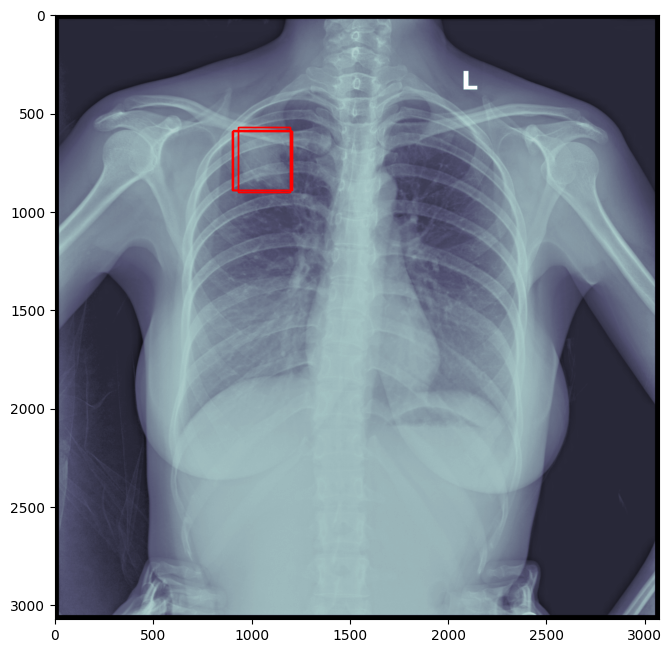

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

file = available_files[2]
dcom_image = pydicom.dcmread(os.path.join(train_data_path, file + '.dicom'))
display(train_data_desc.loc[train_data_desc.image_id == file])

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(dcom_image.pixel_array, cmap=plt.cm.bone)

# Create a Rectangle patch
for index, row in train_data_desc.loc[train_data_desc.image_id == file].iterrows():
    
    rect = patches.Rectangle(
        (row.x_min,row.y_min),
        row.x_max - row.x_min,
        row.y_max - row.y_min,
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)
#     plt.text((50,100), 300, 40)

plt.show()